$第三题$

$l=m=0时化简原函数$

$$Z_{00}(1;q^2)=\frac{1}{\sqrt{4\pi}}\sum_n\frac{e^{q^2-n^2}}{n^2-q^2}+\pi\sum_{m\ne 0}\frac{q^{2m}}{m!(2m-1)}+\frac{\sqrt\pi}{2}\sum_{n\ne 0}
\int_0^1dt\cdot t^{-3/2}e^{tq^2-(\pi^2/t)n^2}-\pi$$

$$(a)$$

第二项的无穷求和与三维数n无关,且在m足够大的情况下该项的相对误差很容易控制在$10^{-7}$以内,考虑到$q^2<3$,本题将m的值取为100，分析误差不再考虑此项.

In [182]:
#输出数据时用到了文件包“prettytable.py”
import math
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
#第一项求和
def F1(Q1,N1):
    count1=0
    sum2=0
    for i in range(-int(math.sqrt(N1))-1,int(math.sqrt(N1))+2):
        for j in range(-int(math.sqrt(N1))-1,int(math.sqrt(N1))+2):
            for k in range(-int(math.sqrt(N1))-1,int(math.sqrt(N1))+2):
                if(i**2+j**2+k**2==N1):
                    count1=count1+1
                    sum2=sum2+math.exp(Q1-i**2-j**2-k**2)/(i**2+j**2+k**2-Q1)
                elif(i**2+j**2+k**2<N1):
                    sum2=sum2+math.exp(Q1-i**2-j**2-k**2)/(i**2+j**2+k**2-Q1)
    return([count1,sum2/(math.sqrt(4*math.pi))])           
#第二项求和
def F2(Q2):
    sum2=0
    M2=100
    for i in range(1,M2):
        mm=1
        for j in range(1,i+1):
            mm=mm*j
        sum2=sum2+math.pi*Q2**i/((2*i-1)*mm)
    return(math.pi*sum2)   
#第三项:先用高斯积分法积分
#高斯节点与对应的系数
X=[0.93246951,-0.93246951,0.66120939,-0.66120939,0.23861919,-0.23861919]
K=[0.17132449,0.17132449,0.36076157,0.36076157,0.46791393,0.46791393]
def f3(q3,n3,t3):#定义被积函数并将积分区间变为【-1,1】
    return((t3/2+0.5)**(-1.5)*math.exp((t3/2+0.5)*q3-(2*math.pi**2/(t3+1))*n3))
def Gauss(q31,n31):
    sum31=0
    for i in range(len(X)):
        sum31=sum31+K[i]*f3(q31,n31,X[i])
    return(sum31/2)#转换积分区间时多出系数1/2
def F3(Q3,N3):
    count3=0
    sum3=0
    for i in range(-int(math.sqrt(N3))-1,int(math.sqrt(N3))+2):
        for j in range(-int(math.sqrt(N3))-1,int(math.sqrt(N3))+2):
            for k in range(-int(math.sqrt(N3))-1,int(math.sqrt(N3))+2):
                if(i**2+j**2+k**2!=0):
                    if(i**2+j**2+k**2==N3):
                        count3=count3+1
                        sum3=sum3+Gauss(Q3,i**2+j**2+k**2)
                    elif(i**2+j**2+k**2<N3):
                        sum3=sum3+Gauss(Q3,i**2+j**2+k**2)
    return([count3,0.5*math.sqrt(math.pi)*sum3])
#q^2的取值
NN1=[]
COUNT=[]
NN3=[]
XS1=[]
XS3=[]
QQ=[0.001,0.01,0.1,0.5,0.9,0.99,0.999,1.001,1.01,1.1,1.5,1.9,1.99,1.999,2.001,2.01,2.1,2.5,2.9,2.99,2.999]
for i in QQ:
    for j in range(1,50):
        SS1=F1(i,j)[1]
        Ss1=F1(i,j+1)[1]
        if(SS1!=Ss1):
            if(abs((Ss1-SS1)/SS1)<10**(-7)):
                NN1.append(j)
                break
    for k in range(1,50):
        SS3=F3(i,k)[1]
        Ss3=F3(i,k+1)[1]
        if(SS3!=Ss3):
            if(abs((Ss3-SS3)/SS3)<10**(-7)):
                NN3.append(k)
                break
#n^2取不同值时三维数n的简并度
for i in range(1,50):
    COUNT.append(F1(0.001,i)[0])
#计算需要保留的项数
def XS(x):
    xs=0
    for i in range(0,x-1):
        xs=xs+COUNT[i]
    return(xs)
for i in range(len(QQ)):
    XS1.append(XS(NN1[i]))
for j in range(len(QQ)):
    XS3.append(XS(NN3[j]))
col = PrettyTable()
col.add_column("q^2",QQ)
col.add_column("第一项符合精度10^-6要求的n^2",NN1)
col.add_column("第一项应保留的项数",XS1)
col.add_column("第三项符合精度10^-6要求的n^2",NN3)
col.add_column("第三项应保留的项数",XS3)
print(col)
N=[i for i in range(1,50)]
col2 = PrettyTable()
col2.add_column("n",N)
col2.add_column("简并度",COUNT)
print(col2)

+-------+------------------------------+--------------------+------------------------------+--------------------+
|  q^2  | 第一项符合精度10^-6要求的n^2 | 第一项应保留的项数 | 第三项符合精度10^-6要求的n^2 | 第三项应保留的项数 |
+-------+------------------------------+--------------------+------------------------------+--------------------+
| 0.001 |              10              |        122         |              2               |         6          |
|  0.01 |              11              |        146         |              2               |         6          |
|  0.1  |              15              |        250         |              2               |         6          |
|  0.5  |              15              |        250         |              2               |         6          |
|  0.9  |              15              |        250         |              2               |         6          |
|  0.99 |              11              |        146         |              2               |         6          |
| 0.999 |   

In [177]:
NN2=[]
NN6=[]
XS2=[]
XS6=[]
QQ=[0.001,0.01,0.1,0.5,0.9,0.99,0.999,1.001,1.01,1.1,1.5,1.9,1.99,1.999,2.001,2.01,2.1,2.5,2.9,2.99,2.999]
for i in QQ:
    for j in range(1,50):
        SS1=F1(i,j)[1]
        Ss1=F1(i,j+1)[1]
        if(SS1!=Ss1):
            if(abs((Ss1-SS1)/SS1)<10**(-13)):
                NN2.append(j)
                break
    for k in range(1,50):
        SS3=F3(i,k)[1]
        Ss3=F3(i,k+1)[1]
        if(SS3!=Ss3):
            if(abs((Ss3-SS3)/SS3)<10**(-13)):
                NN6.append(k)
                break
for i in range(len(QQ)):
    XS2.append(XS(NN2[i]))
for j in range(len(QQ)):
    XS6.append(XS(NN6[j]))
col1 = PrettyTable()
col1.add_column("q^2",QQ)
col1.add_column("第一项符合精度10^-12要求的n^2",NN2)
col1.add_column("第一项应保留的项数",XS2)
col1.add_column("第三项符合精度10^-12要求的n^2",NN6)
col1.add_column("第一项应保留的项数",XS6)
print(col1)

+-------+-------------------------------+--------------------+-------------------------------+--------------------+
|  q^2  | 第一项符合精度10^-12要求的n^2 | 第一项应保留的项数 | 第三项符合精度10^-12要求的n^2 | 第一项应保留的项数 |
+-------+-------------------------------+--------------------+-------------------------------+--------------------+
| 0.001 |               23              |        460         |               3               |         18         |
|  0.01 |               26              |        514         |               3               |         18         |
|  0.1  |               28              |        618         |               3               |         18         |
|  0.5  |               29              |        618         |               3               |         18         |
|  0.9  |               28              |        618         |               3               |         18         |
|  0.99 |               24              |        460         |               3               |         18     

$事实上如果算入n=0时的简并度，上述第一项求和应该保留的项数比上表多一$

$$(b)$$


F:\phython\install\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide


q^2的值为：0.719027


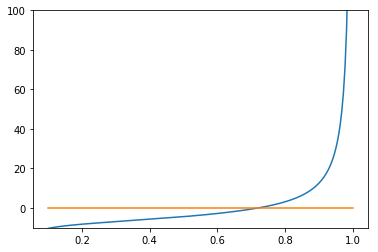

In [184]:
#输出数据时用到了文件包“prettytable.py”
import math
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
#第一项求和
def F1(Q1,N1):
    count1=0
    sum2=0
    for i in range(-int(math.sqrt(N1))-1,int(math.sqrt(N1))+2):
        for j in range(-int(math.sqrt(N1))-1,int(math.sqrt(N1))+2):
            for k in range(-int(math.sqrt(N1))-1,int(math.sqrt(N1))+2):
                if(i**2+j**2+k**2==N1):
                    count1=count1+1
                    sum2=sum2+np.exp(Q1-i**2-j**2-k**2)/(i**2+j**2+k**2-Q1)
                elif(i**2+j**2+k**2<N1):
                    sum2=sum2+np.exp(Q1-i**2-j**2-k**2)/(i**2+j**2+k**2-Q1)
    return([count1,sum2/(math.sqrt(4*math.pi))])           
#第二项求和
def F2(Q2):
    sum2=0
    M2=100
    for i in range(1,M2):
        mm=1
        for j in range(1,i+1):
            mm=mm*j
        sum2=sum2+math.pi*Q2**i/((2*i-1)*mm)
    return(math.pi*sum2)   
#第三项:先用高斯积分法积分
#高斯节点与对应的系数
X=[0.93246951,-0.93246951,0.66120939,-0.66120939,0.23861919,-0.23861919]
K=[0.17132449,0.17132449,0.36076157,0.36076157,0.46791393,0.46791393]
def f3(q3,n3,t3):#定义被积函数并将积分区间变为【-1,1】
    return((t3/2+0.5)**(-1.5)*np.exp((t3/2+0.5)*q3-(2*math.pi**2/(t3+1))*n3))
def Gauss(q31,n31):
    sum31=0
    for i in range(len(X)):
        sum31=sum31+K[i]*f3(q31,n31,X[i])
    return(sum31/2)#转换积分区间时多出系数1/2
def F3(Q3,N3):
    count3=0
    sum3=0
    for i in range(-int(math.sqrt(N3))-1,int(math.sqrt(N3))+2):
        for j in range(-int(math.sqrt(N3))-1,int(math.sqrt(N3))+2):
            for k in range(-int(math.sqrt(N3))-1,int(math.sqrt(N3))+2):
                if(i**2+j**2+k**2!=0):
                    if(i**2+j**2+k**2==N3):
                        count3=count3+1
                        sum3=sum3+Gauss(Q3,i**2+j**2+k**2)
                    elif(i**2+j**2+k**2<N3):
                        sum3=sum3+Gauss(Q3,i**2+j**2+k**2)
    return([count3,0.5*math.sqrt(math.pi)*sum3])
def F(Q,N):
    s=F1(Q,N)[1]+F2(Q)+F3(Q,N)[1]-math.pi
    return(s)
X1=np.linspace(0.1,1,200)
Y1=[0 for i in range(200)]
plt.plot(X1,F(X1,20)-math.pi**1.5*(1+X1))
plt.ylim(-10,100)
plt.plot(X1,Y1)
#用二分法求解方程
def y(G):
    g=F(G,30)-math.pi**1.5*(1+G)
    return(g)
#由图知道根在0.8附近
a1,a2=[0.6,0.9]
b=(a1+a2)/2
while(abs(y(b))>10**(-6)):
    if(y(b)<0):
        a1=b
    elif(y(b)>0):
        a2=b
    b=(a1+a2)/2
print("q^2的值为：%.6f"%b)